In [97]:
# @title Google Drive connection

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import plotly.express as px

# Pandas with new line delimited JSON

In [99]:
df_j = pd.read_json("/content/drive/MyDrive/bq-results-20230308-204000-1678308030674/bq-results-20230308-204000-1678308030674.json", lines = True) 

In [100]:
df_j.head()

,event_date,event_timestamp,event_name,event_params,event_previous_timestamp,user_pseudo_id,user_properties,user_first_touch_timestamp,device,geo,app_info,traffic_source,stream_id,platform,user_ltv,event_bundle_sequence_id,event_server_timestamp_offset
0,20180701,1530484313289000,screen_view,"[{'key': 'firebase_screen_class', 'value': {'s...",1.530242e+15,0AF67C1A1C8F3785609B4210C3E04FC8,"[{'key': 'ad_frequency', 'value': {'string_val...",1498873240150000,"{'category': 'mobile', 'mobile_brand_name': 'n...","{'continent': 'Americas', 'country': 'United S...","{'id': 'com.labpixies.flood', 'version': '2.62...","{'name': '(direct)', 'medium': '(none)', 'sour...",1051193346,ANDROID,NaN,NaN,NaN
1,20180701,1530484288504003,user_engagement,"[{'key': 'firebase_screen_class', 'value': {'s...",1.530242e+15,0AF67C1A1C8F3785609B4210C3E04FC8,"[{'key': 'ad_frequency', 'value': {'string_val...",1498873240150000,"{'category': 'mobile', 'mobile_brand_name': 'n...","{'continent': 'Americas', 'country': 'United S...","{'id': 'com.labpixies.flood', 'version': '2.62...","{'name': '(direct)', 'medium': '(none)', 'sour...",1051193346,ANDROID,NaN,NaN,NaN
2,20180701,1530493994131017,post_score,"[{'key': 'level_name', 'value': {'string_value...",1.529931e+15,525E3BEE74AD824923CC04FE45E45B40,"[{'key': 'ad_frequency', 'value': {'string_val...",1473814855637000,"{'category': 'mobile', 'mobile_brand_name': 'n...","{'continent': 'Americas', 'country': 'United S...","{'id': 'com.labpixies.flood', 'version': '2.62...","{'name': '(direct)', 'medium': '(none)', 'sour...",1051193346,ANDROID,NaN,NaN,NaN
3,20180701,1530494095262011,post_score,"[{'key': 'level_name', 'value': {'string_value...",1.530494e+15,525E3BEE74AD824923CC04FE45E45B40,"[{'key': 'ad_frequency', 'value': {'string_val...",1473814855637000,"{'category': 'mobile', 'mobile_brand_name': 'n...","{'continent': 'Americas', 'country': 'United S...","{'id': 'com.labpixies.flood', 'version': '2.62...","{'name': '(direct)', 'medium': '(none)', 'sour...",1051193346,ANDROID,NaN,NaN,NaN
4,20180701,1530494234072011,post_score,"[{'key': 'level_name', 'value': {'string_value...",1.530494e+15,525E3BEE74AD824923CC04FE45E45B40,"[{'key': 'ad_frequency', 'value': {'string_val...",1473814855637000,"{'category': 'mobile', 'mobile_brand_name': 'n...","{'continent': 'Americas', 'country': 'United S...","{'id': 'com.labpixies.flood', 'version': '2.62...","{'name': '(direct)', 'medium': '(none)', 'sour...",1051193346,ANDROID,NaN,NaN,NaN


# User count who has a screen view event with timestamp info

In [101]:
# Filtering for 1st screen view event of the user
df_minsv = df_j[df_j["event_name"] == "screen_view"].groupby("user_pseudo_id")["event_timestamp"].min()
df_minsv = pd.DataFrame(df_minsv).reset_index()

# Join with main table to get all columns
# uwt = user with timestamp
df_uwt = df_j.merge(df_minsv, left_on=["user_pseudo_id", "event_timestamp"], right_on=["user_pseudo_id", "event_timestamp"])

#Calculating how many people come from which country using country info

In [102]:
# Exploring the geo column
df_uwt['geo'][19]

{'continent': 'Americas', 'country': 'United States'}

## Extracting country information

In [103]:
# Define a function to extract the country value from each row
def extract_country(row):
    return row['geo']['country']

# Apply the function to each row and create a new 'country' column
df_uwt['country'] = df_uwt.apply(extract_country, axis=1)

In [104]:
# Converts a pandas series object to a pandas dataframe with a single column named
# df_series_to_frame = df_country.to_frame().rename(columns={0: 'country'})

In [105]:
# Joining two dataframes
# joined_df = pd.merge(df_uft, df_series_to_frame, on='country', how='left')
# joined_df.head()

## Selecting limited columns for calculations

In [106]:
# Selecting columns for analysis
selected_columns = ['event_date', 'event_timestamp', 'user_pseudo_id', 'platform', 'user_ltv', 'country']

df_limited = df_uwt.loc[:, selected_columns]
df_limited.head()

,event_date,event_timestamp,user_pseudo_id,platform,user_ltv,country
0,20180701,1530484313289000,0AF67C1A1C8F3785609B4210C3E04FC8,ANDROID,NaN,United States
1,20180701,1530493894777000,525E3BEE74AD824923CC04FE45E45B40,ANDROID,NaN,United States
2,20180701,1530478583729000,65D7715C409E6A38667447CE2B52AFFE,ANDROID,NaN,New Zealand
3,20180701,1530438249735000,83D8C7F90DAF2C832F05A9DDD8693135,ANDROID,NaN,India
4,20180701,1530491625367000,0F67E233B19D2898229CD156974A93AE,ANDROID,NaN,United States


## Extracting hour info from timestamp

In [107]:
# Extract hour detail from timestamp - unix time stamp converter function/library
import datetime

def get_hour_from_timestamp(timestamp):

    # Convert microseconds to seconds and convert to datetime object
    dt_object = datetime.datetime.fromtimestamp(timestamp / 1000000.0)
    
    # Extract the hour from the datetime object
    hour = dt_object.hour
    
    return hour

In [108]:
# Apply the get_hour_from_timestamp() function to the event_timestamp column
df_limited['hour'] = df_limited['event_timestamp'].apply(get_hour_from_timestamp)

# Drop the 'event_timestamp' column
df_limited.drop(columns=['event_timestamp'], inplace = True)

## Calculating results

In [109]:
# Group by country and count unique user_pseudo_id values
df_id_by_country = df_limited.groupby('country')['user_pseudo_id'].count().sort_values(ascending=False).to_frame()

In [110]:
# Group by country and count unique user_pseudo_id values
# df_country_counts = df_limited.groupby('country')['user_pseudo_id'].nunique()

# Converts a pandas series object to a pandas dataframe with a single column named
# df_series_to_frame_c = df_country_counts.to_frame().rename(columns={0: 'country_counts'})

# Sort the dataframe in descending order
# df_series_to_frame_c = df_series_to_frame_c.sort_values(by='user_pseudo_id', ascending=False)
# df_series_to_frame_c.head()

## Visualizations

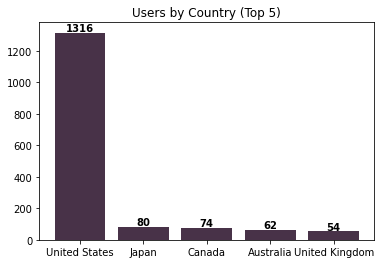

In [111]:
# Select only the top 20 countries based on the user_pseudo_id values
df_top_5 = df_id_by_country.nlargest(5, 'user_pseudo_id')

# Create a bar chart of the user_pseudo_id values for each country
plt.bar(df_top_5.index, df_top_5['user_pseudo_id'], color='#483248')

# Set the title and axis labels for the plot
plt.title('Users by Country (Top 5)')

# Add text labels to the top of each bar
for i, v in enumerate(df_top_5['user_pseudo_id']):
    plt.text(i, v+10, str(v), ha='center', fontweight='bold')

# Show the plot
plt.show()

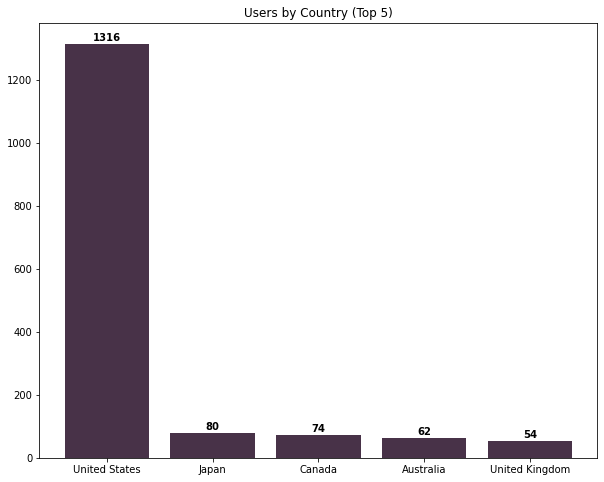

In [112]:
# Create a plot with a specific size
fig, ax = plt.subplots(figsize=(10, 8))

ax.bar(df_top_5.index, df_top_5['user_pseudo_id'], color='#483248')

# Set the title and axis labels for the plot
plt.title('Users by Country (Top 5)')

# Add text labels to the top of each bar
for i, v in enumerate(df_top_5['user_pseudo_id']):
    plt.text(i, v+10, str(v), ha='center', fontweight='bold')

#Calculating how many individuals utilize the application on an hourly basis

In [113]:
# Selecting columns without dictionary

# Create a list of columns to drop
cols_to_drop = ['event_params', 'user_properties', 'device', 'geo', 'app_info', 'traffic_source']

# Select all columns except those to drop
df_uwt = df_uwt.drop(cols_to_drop, axis=1)

In [114]:
# How many people viewed the screen within a day? - groupby event date count user id

# df_uwt = df_uwt.groupby('event_date')['user_pseudo_id'].nunique()

## Extracting hour

In [115]:
# Extract hour detail from timestamp - unix time stamp converter function/library
def get_hour_from_timestamp(timestamp):

    # Convert microseconds to seconds and convert to datetime object
    dt_object = datetime.datetime.fromtimestamp(timestamp / 1000000.0)
    
    # Extract the hour from the datetime object
    hour = dt_object.hour
    
    return hour

In [116]:
# Apply the get_hour_from_timestamp() function to the event_timestamp column
df_uwt['hour'] = df_uwt['event_timestamp'].apply(get_hour_from_timestamp)

# Drop the 'event_timestamp' column
df_uwt = df_uwt.drop(columns=['event_timestamp'])

# Group by hour and count unique user_pseudo_id values
df_hourly_counts = df_uwt.groupby('hour')['user_pseudo_id'].count().to_frame()

<Axes: title={'center': 'Hourly User Count'}, xlabel='hour'>

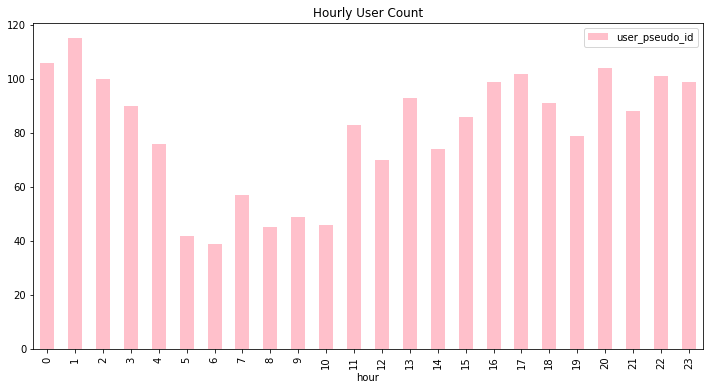

In [117]:
# Visualize the hourly count data
df_hourly_counts.plot(kind='bar', figsize=(12, 6), title='Hourly User Count', color='pink')

# Calculating average number of events per user



In [181]:
# Selecting level complete quickplay event
df_quickplay = df_j[df_j["event_name"] == "level_complete_quickplay"]

# Unique user by event date
df_quickplay_ed = df_quickplay.groupby(['event_date'])['user_pseudo_id'].nunique().reset_index(name='total_unique_user')
df_quickplay_ed

,event_date,total_unique_user
0,20180701,16
1,20180702,258
2,20180703,231
3,20180704,227
4,20180705,239


In [180]:
df_quickplay_grouped = df_quickplay.groupby('event_date')['user_pseudo_id'].count().reset_index(name='total_event_count')
df_quickplay_grouped

,event_date,total_event_count
0,20180701,142
1,20180702,1896
2,20180703,1938
3,20180704,2087
4,20180705,1798


In [193]:
# Merging dataframes
merged_df = pd.merge(df_quickplay_ed, df_quickplay_grouped, on='event_date')

# Average event count per user
merged_df['events_per_user'] = merged_df['total_event_count'] / merged_df['total_unique_user']

# Changing event_date format
merged_df['event_date'] = pd.to_datetime(merged_df['event_date'], format='%Y%m%d')
merged_df['event_date'] = merged_df['event_date'].dt.strftime('%d %B')

merged_df

,event_date,total_unique_user,total_event_count,events_per_user
0,01 July,16,142,8.875000
1,02 July,258,1896,7.348837
2,03 July,231,1938,8.389610
3,04 July,227,2087,9.193833
4,05 July,239,1798,7.523013


In [203]:
# Visualization by type of area chart
fig = px.area(merged_df, x="event_date", y="events_per_user", title="Events per User by Date")
fig.update_traces(line_dash='dot')
fig.show()

# Next Step

- event_params içinde key:firebase_screen_class ve values:shop_menu > buradaki unique kişi sayısı ve yine yukarıdaki gibi bu event kaç kere tetiklendi

  Note: görseller area chart olacak

#Polars

Polars can speed up data calculations.

In [120]:
!pip install polars

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [121]:
import polars as pl

In [122]:
df_pl = pl.read_ndjson("/content/drive/MyDrive/bq-results-20230308-204000-1678308030674/bq-results-20230308-204000-1678308030674.json")

In [123]:
df_pl.head()

event_date,event_timestamp,event_name,event_params,event_previous_timestamp,user_pseudo_id,user_properties,user_first_touch_timestamp,device,geo,app_info,traffic_source,stream_id,platform
str,str,str,str,str,str,list[struct[2]],str,struct[10],struct[4],struct[4],struct[3],str,str
"""20180701""","""15304843132890...","""screen_view""",null,"""15302415724350...","""0AF67C1A1C8F37...","[{""ad_frequency"",{""16"",""1498873315027000"",null}}, {""initial_extra_steps"",{""10"",""1498873315027000"",null}}, … {""first_open_time"",{null,""1498873312150000"",""1498873240150000""}}]","""14988732401500...","{""mobile"",""not available in demo dataset"",""not available in demo dataset"",""not available in demo dataset"",""not available in demo dataset"",""ANDROID"",""not available in demo dataset"",""en-us"",""No"",""-18000""}","{""Americas"",""United States"",null,null}","{""com.labpixies.flood"",""2.62"",""1:300830567303:android:9b9ba2ce17104d0c"",""com.android.vending""}","{""(direct)"",""(none)"",""(direct)""}","""1051193346""","""ANDROID"""
"""20180701""","""15304842885040...","""user_engagemen...",null,"""15302415734180...","""0AF67C1A1C8F37...","[{""ad_frequency"",{""16"",""1498873286027000"",null}}, {""initial_extra_steps"",{""10"",""1498873286027000"",null}}, … {""first_open_time"",{null,""1498873283150000"",""1498873240150000""}}]","""14988732401500...","{""mobile"",""not available in demo dataset"",""not available in demo dataset"",""not available in demo dataset"",""not available in demo dataset"",""ANDROID"",""not available in demo dataset"",""en-us"",""No"",""-18000""}","{""Americas"",""United States"",null,null}","{""com.labpixies.flood"",""2.62"",""1:300830567303:android:9b9ba2ce17104d0c"",""com.android.vending""}","{""(direct)"",""(none)"",""(direct)""}","""1051193346""","""ANDROID"""
"""20180701""","""15304939941310...","""post_score""",null,"""15299311732590...","""525E3BEE74AD82...","[{""ad_frequency"",{""3"",""1481415817844000"",null}}, {""initial_extra_steps"",{""5"",""1476659380644000"",null}}, … {""first_open_time"",{null,""1473814843637000"",""1473814855637000""}}]","""14738148556370...","{""mobile"",""not available in demo dataset"",""not available in demo dataset"",""not available in demo dataset"",""not available in demo dataset"",""ANDROID"",""not available in demo dataset"",""en-us"",""Yes"",""-25200""}","{""Americas"",""United States"",null,null}","{""com.labpixies.flood"",""2.62"",""1:300830567303:android:9b9ba2ce17104d0c"",""com.android.vending""}","{""(direct)"",""(none)"",""(direct)""}","""1051193346""","""ANDROID"""
"""20180701""","""15304940952620...","""post_score""",null,"""15304939251310...","""525E3BEE74AD82...","[{""ad_frequency"",{""3"",""1481415777844000"",null}}, {""initial_extra_steps"",{""5"",""1476659340644000"",null}}, … {""first_open_time"",{null,""1473814803637000"",""1473814855637000""}}]","""14738148556370...","{""mobile"",""not available in demo dataset"",""not available in demo dataset"",""not available in demo dataset"",""not available in demo dataset"",""ANDROID"",""not available in demo dataset"",""en-us"",""Yes"",""-25200""}","{""Americas"",""United States"",null,null}","{""com.labpixies.flood"",""2.62"",""1:300830567303:android:9b9ba2ce17104d0c"",""com.android.vending""}","{""(direct)"",""(none)"",""(direct)""}","""1051193346""","""ANDROID"""
"""20180701""","""15304942340720...","""post_score""",null,"""15304940662620...","""525E3BEE74AD82...","[{""ad_frequency"",{""3"",""1481415777844000"",null}}, {""initial_extra_steps"",{""5"",""1476659340644000"",null}}, … {""first_open_time"",{null,""1473814803637000"",""1473814855637000""}}]","""14738148556370...","{""mobile"",""not available in demo dataset"",""not available in demo dataset"",""not available in demo dataset"",""not available in demo dataset"",""ANDROID"",""not available in demo dataset"",""en-us"",""Yes"",""-25200""}","{""Americas"",""United States"",null,null}","{""com.labpixies.flood"",""2.62"",""1:300830567303:android:9b9